## Project Workflow: Global Shark Attacks Data Analysis

### 1. Data Load

- 1.1. Import necessary libraries.
- 1.2. Load the dataset.

### 2. Data Exploration

- 2.1. Check the shape of the dataset, Duplicate Rows Number, Duplicate Rows Number.
- 2.2. Assess data quality: identify missing values and % of missing values.
- 2.3. Indentify the structure of the dataset (numerical vs. categorical data).

### 3. Data Cleaning

#### 3.1. Standardize Column Names

- 3.1.1. Remove leading and trailing spaces and underscores.
- 3.1.2. Replace non-alphanumeric characters with underscores.
- 3.1.3. Convert column names to lowercase.

#### 3.2. Dealing with Duplicates

- 3.2.1. Identify duplicate entries.
- 3.2.2. Remove duplicates.

#### 3.3. Correcting Data Types

- 3.3.1. Ensure columns have the correct data types.
- 3.3.2. Parse dates: Convert strings to datetime objects.
- 3.3.3.Parse time from col 'time' and aggregate results in bins 'Morning', 'Day', 'Evening', 'Night'

#### 3.4. Handling Missing Values

- 3.4.1. Identify missing data.
- 3.4.2. Delete rows that have 99.99% missing data, and irrelevant cols: 'href_formula','href', 'unnamed_11', 'pdf', 'case_number','case_number_1','original_order'
- 3.4.3. Delete rows with missing data, keep rows with at least threshold = 8 non-missing values
- 3.4.4. Impute missing values in numerical columns by replacing with the mean, median, or mode
- 3.4.5. replace NaN with the last valid observation
- 3.4.6. Impute missing values in categorical columns by replacing with the most frequent value (mode) and `'Unknown'`.

#### 3.5. Values Correction: Correcting Typos, Handling Synonyms, Standardizing Formats (countries, states, cities etc.)

- 3.5.1. Values correction in 'activity' col
- 3.5.2. correction typos in the col 'type'
- 3.5.3. Format spelling in col col 'country'
- 3.5.4. Format spelling in col 'state'
- 3.5.5. Values correction in the col 'sex'
- 3.5.6. Insert col 'Fatal_status' with extracted data from col 'injury'
- 3.5.7. Values correction in the col 'injury', insert col 'injury_type'
- 3.5.8. Values correction in the col 'species'

#### 3.6. Handling Outliers

- 3.6.1. Identify outliers using methods like box plots
- 3.6.2. Cap outliers by replacing them with a cap value(95th or 99th percentile)
- 3.6.3. Remove outliers if they are errors or irrelevant.

### 4. Visualizations

- 4.1. Attacks number by year (line graph)
- 4.2. Attacks number per Activity (bar chart)
- 4.3. Attacks number per Countries/States (bar chart)
- 4.4. Attacks counts per Months (bar chart)
- 4.5. Victims by 'age_group' (make bins, bar chart)
- 4.6. Attacks by time of the day (pie chart)
- 4.7. Victims by 'sex' (staked bar chart)
- 4.8. Fatality status (pie chart)


---


### 1. Data Load

#### 1.1. Import necessary libraries.


In [45]:
import pandas as pd
import xlrd  # import csv/excel file
import re  # regex
import matplotlib.pyplot as plt  # for box plot outliers
import plotly.express as px  # for visualizations
import seaborn as sns  # for visualizations

#### 1.2. Load the dataset.


In [46]:
# import dataset
df = pd.read_csv('../eda_sharks_project/data/raw_data/GSAF5.csv')
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Unnamed: 11,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order
0,15-Mar-24,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,...,NaN,16h00,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN
1,04-Mar-24,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,N,NaN,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN
2,02-Mar-24,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,N,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN
3,25-Feb-24,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,...,N,11h30,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN
4,14-Feb-24,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,...,N,NaN,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN


### 2. Data Exploration

#### 2.1. Check the shape of the dataset, Duplicate Rows Number, Duplicate Rows Number.


In [47]:
# 2.1. Perform initial data check:
def initial_data_checking(df):
    # Print the shape of the DataFrame (number of rows and columns)
    print("\nShape of the DataFrame:\n")
    print(df.shape)

    # Print the count of duplicate rows
    print("\nDuplicate Rows Number:\n")
    print(df.duplicated().sum())

    # Print summary statistics for numerical columns
    print("\nSummary Statistics:\n")
    print(df.describe())


initial_data_checking(df)


Shape of the DataFrame:

(6969, 21)

Duplicate Rows Number:

24

Summary Statistics:

              Year  original order
count  6942.000000     6799.000000
mean   1934.403342     3401.152081
std     272.920956     1963.076319
min       0.000000        2.000000
25%    1947.000000     1701.500000
50%    1985.000000     3401.000000
75%    2009.000000     5100.500000
max    2024.000000     6802.000000


#### 2.2. Assess data quality: identify missing values and % of missing values.


In [48]:
# 2.2. Assess data quality: identify missing values and % of missing values
def unique_and_missing_values_dtype(df):
    # Non-null counts and data types
    non_null_counts = df.notnull().sum()
    dtypes = df.dtypes

    # Count of unique values
    unique_count = df.nunique()

    # Percentage of unique values
    unique_percentage = (df.nunique() / len(df)) * 100

    # Count of missing values
    missing_count = df.isnull().sum()

    # Percentage of missing values
    missing_percentage = df.isnull().mean() * 100

    # Combine into a DataFrame
    summary = pd.DataFrame({
        'non-Null_count': non_null_counts,
        'dtype': dtypes,
        'unique_values': unique_count,
        '%_unique': unique_percentage.round(2).astype(str) + '%',
        'missing_values': missing_count,
        '%_missing': missing_percentage.round(2).astype(str) + '%'
    })

    return summary


unique_and_missing_values_dtype(df)

,non-Null_count,dtype,unique_values,%_unique,missing_values,%_missing
Date,6944,object,5912,84.83%,25,0.36%
Year,6942,float64,259,3.72%,27,0.39%
Type,6926,object,12,0.17%,43,0.62%
Country,6894,object,225,3.23%,75,1.08%
State,6462,object,902,12.94%,507,7.28%
Location,6379,object,4514,64.77%,590,8.47%
Activity,6358,object,1587,22.77%,611,8.77%
Name,6724,object,5683,81.55%,245,3.52%
Sex,6365,object,8,0.11%,604,8.67%
Age,3950,object,163,2.34%,3019,43.32%


#### 2.3. Indentify the structure of the dataset (numerical vs. categorical data).


In [49]:
# 2.3.1. Indentify the structure of the dataset (numerical vs. categorical data).. Separate categorical and numerical columns:
def separate_columns(df):
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    numerical_cols = df.select_dtypes(include=['number']).columns
    print("\ncategorical_cols:\n")
    print(categorical_cols)
    print("\nnumerical_cols:\n")
    print(numerical_cols)


separate_columns(df)


categorical_cols:

Index(['Date', 'Type', 'Country', 'State', 'Location', 'Activity', 'Name',
       'Sex', 'Age', 'Injury', 'Unnamed: 11', 'Time', 'Species ', 'Source',
       'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1'],
      dtype='object')

numerical_cols:

Index(['Year', 'original order'], dtype='object')


In [50]:
# 2.3.2. Detailed Analysis of Numerical Data:
def analyze_numerical(df):
    # Select numerical columns
    numerical_cols = df.select_dtypes(include=['number']).columns
    # Perform descriptive analysis on numerical columns
    numerical_desc = df[numerical_cols].describe()
    # Display the resulting DataFrame
    print("\nNumerical Columns Analysis:")
    return numerical_desc


analyze_numerical(df)


Numerical Columns Analysis:


,Year,original order
count,6942.000000,6799.000000
mean,1934.403342,3401.152081
std,272.920956,1963.076319
min,0.000000,2.000000
25%,1947.000000,1701.500000
50%,1985.000000,3401.000000
75%,2009.000000,5100.500000
max,2024.000000,6802.000000


In [51]:
# 2.3.3. detailed analysis of categorical cols
def analyze_categorical(df):
    # Select categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    # Perform descriptive analysis on categorical columns
    categorical_desc = df[categorical_cols].describe()
    # Display the resulting DataFrame
    print("\nCategorical Columns Analysis:")
    return categorical_desc


analyze_categorical(df)


Categorical Columns Analysis:


,Date,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Unnamed: 11,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1
count,6944,6926,6894,6462,6379,6358,6724,6365,3950,6909,6382,3418,3812,6925,6799,6819,6796,6798,6797
unique,5912,12,225,902,4514,1587,5683,8,163,4079,12,410,1675,5302,6789,6785,6776,6777,6775
top,1957,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,17,FATAL,N,Afternoon,White shark,"K. McMurray, TrackingSharks.com",1906.09.27.R.a&b-Munich-Swede.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1907.10.16.R,1907.10.16.R
freq,11,5107,2538,1178,191,1121,680,5578,173,863,4832,215,194,131,2,25,4,2,2


### 3. Data Cleaning

#### 3.1. Standardize Column Names

- Remove leading and trailing spaces and underscores.
- Replace non-alphanumeric characters with underscores.
- Convert column names to lowercase.


In [52]:
# 3.1. Standardize Column Names
def format_column_titles(df):
    # Define a function to clean a single column name
    def clean_column(name):
        name = name.strip()  # Remove leading and trailing spaces
        # Replace non-alphanumeric characters with underscores
        name = re.sub(r'[^0-9a-zA-Z]+', '_', name)
        # Replace multiple underscores with a single underscore
        name = re.sub(r'_+', '_', name)
        name = name.lower()  # Convert to lowercase
        return name.strip('_')  # Remove leading and trailing underscores

    # Apply the clean_column function to all column names in the DataFrame
    df.columns = [clean_column(col) for col in df.columns]
    return df.columns


format_column_titles(df)

Index(['date', 'year', 'type', 'country', 'state', 'location', 'activity',
       'name', 'sex', 'age', 'injury', 'unnamed_11', 'time', 'species',
       'source', 'pdf', 'href_formula', 'href', 'case_number', 'case_number_1',
       'original_order'],
      dtype='object')

#### 3.2. Dealing with Duplicates

- Identify duplicate entries.
- Remove duplicates.


In [53]:
# 3.2. Dealing with Duplicates
df = df.drop_duplicates()
df.head()

,date,year,type,country,state,location,activity,name,sex,age,...,unnamed_11,time,species,source,pdf,href_formula,href,case_number,case_number_1,original_order
0,15-Mar-24,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,...,NaN,16h00,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN
1,04-Mar-24,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,N,NaN,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN
2,02-Mar-24,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,N,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN
3,25-Feb-24,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,...,N,11h30,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN
4,14-Feb-24,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,...,N,NaN,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN


#### 3.3. Correcting Data Types

#### 3.3.1. Ensure columns have the correct data types.


In [54]:
# 3.3. Convert 'age' to numeric.  fills missing data (0 and NaN values) with the mode of the column before converting it to numeric
df = pd.DataFrame(df)


def convert_age(df, column):
    if df is not None and column in df.columns:
        # Convert the column to numeric, setting invalid parsing as NaN
        df[column] = pd.to_numeric(df[column], errors='coerce')

        # Calculate the mode of the column
        col_mean = df[column].mean()

        # Replace NaN and 0 values with the mode
        df[column].fillna(col_mean, inplace=True)
        df[column].replace(0, col_mean, inplace=True)

        return df
    else:
        raise ValueError(
            "DataFrame is None or the specified column does not exist.")


# Convert the 'age' column
df = convert_age(df, 'age')
df

/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_48565/3656290466.py:14: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_48565/3656290466.py:15: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

,date,year,type,country,state,location,activity,name,sex,age,...,unnamed_11,time,species,source,pdf,href_formula,href,case_number,case_number_1,original_order
0,15-Mar-24,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13.000000,...,NaN,16h00,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN
1,04-Mar-24,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,28.042954,...,N,NaN,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN
2,02-Mar-24,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11.000000,...,N,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN
3,25-Feb-24,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46.000000,...,N,11h30,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN
4,14-Feb-24,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32.000000,...,N,NaN,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6940,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,28.042954,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6941,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,28.042954,...,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6942,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,28.042954,...,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0
6943,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15.000000,...,Y,NaN,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0


In [55]:
# 3.4. Convert col 'year' to int
def convert_year_column(df, column):
    """
    This function fills NaN values in the specified 'year' column using forward fill,
    converts the column to integer type, and returns the updated DataFrame along with the data type of the column.

    :param df: pandas DataFrame
    :param column: The name of the column to clean and convert
    :return: Tuple containing the updated DataFrame and the data type of the column
    """
    # Fill NaN values using forward fill method
    df[column] = df[column].fillna(method='ffill')

    # Convert the column to integer type
    df[column] = df[column].astype(int)

    # Return the updated DataFrame and the data type of the column
    return df


df = convert_year_column(df, 'year')
df.head()

/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_48565/639078710.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,date,year,type,country,state,location,activity,name,sex,age,...,unnamed_11,time,species,source,pdf,href_formula,href,case_number,case_number_1,original_order
0,15-Mar-24,2024,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13.000000,...,NaN,16h00,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN
1,04-Mar-24,2024,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,28.042954,...,N,NaN,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN
2,02-Mar-24,2024,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11.000000,...,N,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN
3,25-Feb-24,2024,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46.000000,...,N,11h30,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN
4,14-Feb-24,2024,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32.000000,...,N,NaN,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN


#### 3.3.1. Parse dates. Date data will be extracted from col 'date'. Missing dates data can be extracted from column 'source' that typically includes the recorded date. After extracting date data from cols 'date' and 'source' , data will be combined to get a complete information about the date of accidents.


In [56]:
# 3.3.1. Parse dates from col 'date'
def parse_dates_and_drop(df, date_column):
    def parse_dates(date):
        for fmt in ("%d %b %Y", "%d-%b-%Y"):
            try:
                return pd.to_datetime(date, format=fmt)
            except ValueError:
                continue
        return pd.NaT
    # Apply the parse_dates function to the specified date_column
    df['date_cleaned'] = df[date_column].apply(parse_dates)
    # Drop the old date column
    df.drop(columns=[date_column], inplace=True)
    return df


df = parse_dates_and_drop(df, 'date')
df.head()

,year,type,country,state,location,activity,name,sex,age,injury,...,time,species,source,pdf,href_formula,href,case_number,case_number_1,original_order,date_cleaned
0,2024,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13.000000,"Minor injuries to back, abdomen and legs",...,16h00,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,2024,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,28.042954,"No injury, shark bit surfboard",...,NaN,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,2024,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11.000000,Lacerations to left foot,...,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,2024,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46.000000,Leg bitten,...,11h30,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,2024,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32.000000,Calf of lower left leg injured,...,NaN,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaT


#### 3.3.2. Parse date from col 'source'


In [57]:
# 3.3.2. Parse dates from col 'source'
def extract_and_parse_dates(df, date_column):
    def parse_dates(date_str):
        if isinstance(date_str, str):  # Ensure the input is a string
            # Extract potential date part using regex
            match = re.search(r'(\d{1,2}[-/]\d{1,2}[-/]\d{4})', date_str)
            if match:
                date_str = match.group(0)
                for fmt in ("%d-%b-%Y", "%d/%b/%Y", "%m/%d/%Y", "%m-%d-%Y"):
                    try:
                        return pd.to_datetime(date_str, format=fmt)
                    except ValueError:
                        continue
        return pd.NaT

    # Apply the parse_dates function to the specified date_column
    df['date_cleaned_source'] = df[date_column].apply(parse_dates)

    # Return the modified DataFrame
    return df


df = extract_and_parse_dates(df, 'source')
df.head()

,year,type,country,state,location,activity,name,sex,age,injury,...,species,source,pdf,href_formula,href,case_number,case_number_1,original_order,date_cleaned,date_cleaned_source
0,2024,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13.000000,"Minor injuries to back, abdomen and legs",...,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaT,2024-03-15
1,2024,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,28.042954,"No injury, shark bit surfboard",...,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaT,2024-03-06
2,2024,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11.000000,Lacerations to left foot,...,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaT,2024-03-04
3,2024,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46.000000,Leg bitten,...,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaT,2024-02-26
4,2024,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32.000000,Calf of lower left leg injured,...,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaT,2024-02-14


In [58]:
# 3.3.2a. Merge parsed dates to one column
def merge_date_columns(df, col1, col2, merged_col_name='correct_date'):
    """
    Merges two date columns by taking the first non-null occurrence from either column.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the date columns.
    col1 (str): The name of the first date column.
    col2 (str): The name of the second date column.
    merged_col_name (str): The name of the resulting merged date column (default is 'correct_date').

    Returns:
    pd.DataFrame: The DataFrame with the merged date column.
    """
    # Merge columns by taking the first non-null occurrence
    df[merged_col_name] = df[col1].combine_first(df[col2])
    df = df.drop(columns=['date_cleaned', 'date_cleaned_source'])
    return df


df = merge_date_columns(df, 'date_cleaned', 'date_cleaned_source')
df.head()

,year,type,country,state,location,activity,name,sex,age,injury,...,time,species,source,pdf,href_formula,href,case_number,case_number_1,original_order,correct_date
0,2024,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13.000000,"Minor injuries to back, abdomen and legs",...,16h00,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,2024-03-15
1,2024,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,28.042954,"No injury, shark bit surfboard",...,NaN,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,2024-03-06
2,2024,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11.000000,Lacerations to left foot,...,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,2024-03-04
3,2024,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46.000000,Leg bitten,...,11h30,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,2024-02-26
4,2024,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32.000000,Calf of lower left leg injured,...,NaN,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,2024-02-14


#### 3.3.3.Parse time from col 'time' and aggregate results in bins 'Morning', 'Day', 'Evening', 'Night'


In [59]:
# 3.3.3. Parse time from col 'time' and aggregate results in bins  'Morning', 'Day', 'Evening', 'Night'
def parse_and_bin_time(df, time_column):
    # Define a function to convert time to hour or return predefined periods as they are
    def convert_to_hour_or_bin(time_str):
        # Check if time_str is one of the predefined periods
        predefined_periods = ['Morning', 'Day', 'Evening', 'Night']
        if time_str in predefined_periods:
            return time_str
        elif isinstance(time_str, str):  # Ensure the input is a string
            # Regular expression to extract hour from time string
            match = re.search(r'(\d{1,2})h', time_str)
            if match:
                hour = int(match.group(1))
                return bin_time(hour)
        return 'Unknown'

    # Define the binning logic for hours
    def bin_time(hour):
        if hour in [23, 24, 0, 1, 2, 3, 4]:
            return 'Night'
        elif hour in [5, 6, 7, 8, 9, 10, 11]:
            return 'Morning'
        elif hour in [12, 13, 14, 15, 16, 17]:
            return 'Day'
        elif hour in [18, 19, 20, 21, 22]:
            return 'Evening'
        else:
            return 'Unknown'

    # Apply the function to bin or preserve the time period
    df['time_of_day'] = df[time_column].apply(convert_to_hour_or_bin)
    return df


df = parse_and_bin_time(df, 'time')
df.head()

,year,type,country,state,location,activity,name,sex,age,injury,...,species,source,pdf,href_formula,href,case_number,case_number_1,original_order,correct_date,time_of_day
0,2024,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13.000000,"Minor injuries to back, abdomen and legs",...,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,2024-03-15,Day
1,2024,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,28.042954,"No injury, shark bit surfboard",...,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,2024-03-06,Unknown
2,2024,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11.000000,Lacerations to left foot,...,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,2024-03-04,Day
3,2024,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46.000000,Leg bitten,...,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,2024-02-26,Morning
4,2024,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32.000000,Calf of lower left leg injured,...,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,2024-02-14,Unknown


#### 3.4. Handling Missing Values

- 3.4.1. Identify missing data.
- 3.4.2. Delete rows: Col 'Unnamed: 21' and 'Unnamed: 22' have 99.99% missing data, and irrelevant cols: 'href_formula','href', 'unnamed_11', 'pdf', 'case_number','case_number_1','original_order'- to drop
- 3.4.3. Delete rows with missing data, keep rows with at least threshold = 8 non-missing values
- 3.4.4. Impute missing values in numerical columns by replacing with the mean, median, or mode
- 3.4.5. replace NaN with the last valid observation
- 3.4.6. Impute missing values in categorical columns by replacing with the most frequent value (mode) and `'Unknown'`.


#### 3.4.1. Identify missing data.


In [60]:
# 3.4.1. Identify missing data.
unique_and_missing_values_dtype(df)

,non-Null_count,dtype,unique_values,%_unique,missing_values,%_missing
year,6945,int64,259,3.73%,0,0.0%
type,6926,object,12,0.17%,19,0.27%
country,6894,object,225,3.24%,51,0.73%
state,6462,object,902,12.99%,483,6.95%
location,6379,object,4514,65.0%,566,8.15%
activity,6358,object,1587,22.85%,587,8.45%
name,6724,object,5683,81.83%,221,3.18%
sex,6365,object,8,0.12%,580,8.35%
age,6945,float64,82,1.18%,0,0.0%
injury,6909,object,4079,58.73%,36,0.52%


#### 3.4.2. Delete rows that have 99.99% missing data, and irrelevant cols: 'href_formula','href', 'unnamed_11', 'pdf', 'case_number','case_number_1','original_order'- to drop


In [61]:
# 3.4.2. Delete rows that have 99.99% missing data, and irrelevant cols: 'href_formula','href', 'unnamed_11', 'pdf', 'case_number','case_number_1','original_order'- to drop
df = df.drop(columns=['href_formula', 'href', 'unnamed_11',
             'pdf', 'case_number', 'case_number_1', 'original_order'])

#### 3.4.3. Delete rows with missing data, keep rows with at least threshold = 8 non-missing values


In [62]:
# 3.4.3. Delete rows with missing data, keep rows with at least threshold = 8 non-missing values
def drop_rows_with_many_missing_values(df, threshold):
    """
    Drops rows from the DataFrame that have less than a specified number of non-missing values.

    :param df: pandas DataFrame
    :param threshold: The minimum number of non-missing values required to keep a row
    :return: DataFrame with rows having many missing values dropped
    """
    # Drop rows with fewer non-NA values than the threshold
    df_cleaned = df.dropna(thresh=threshold)
    return df_cleaned


df = drop_rows_with_many_missing_values(df, threshold=8)
df.head()

,year,type,country,state,location,activity,name,sex,age,injury,time,species,source,correct_date,time_of_day
0,2024,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13.000000,"Minor injuries to back, abdomen and legs",16h00,Tiger shark,"Yahoo News, 3/15/2024",2024-03-15,Day
1,2024,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,28.042954,"No injury, shark bit surfboard",NaN,Tiger shark 8',"Surfer, 3/6/2024F",2024-03-06,Unknown
2,2024,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11.000000,Lacerations to left foot,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024",2024-03-04,Day
3,2024,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46.000000,Leg bitten,11h30,Tiger shark,"WA Today, 2/26/2024",2024-02-26,Morning
4,2024,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32.000000,Calf of lower left leg injured,NaN,"Bull shark, 7'","Times of India, 2/14/2024",2024-02-14,Unknown


#### 3.4.4. Impute missing values in numerical columns by replacing with the mean, median, or mode.


In [63]:
import pandas as pd


def age_group(df, age_column='age'):
    """
    This function fills missing values (NaN and 0) in the 'age' column with the mode,
    and then adds an 'age_group' column based on the 'age' column.

    Parameters:
    df (pd.DataFrame): The DataFrame to modify.
    age_column (str): The column name that contains age data. Default is 'age'.

    Returns:
    pd.DataFrame: The DataFrame with the filled 'age' column and new 'age_group' column.
    """

    # Convert the age column to integer type
    df[age_column] = df[age_column].astype(int)

    # Define age bins and labels according to common age group definitions
    bins = [0, 12, 18, 25, 35, 45, 55, 65, 75, 85, 100]
    labels = ['0-12', '13-18', '19-25', '26-35', '36-45',
              '46-55', '56-65', '66-75', '76-85', '86-100']

    # Create the 'age_group' column using pd.cut
    df['age_group'] = pd.cut(df[age_column], bins=bins,
                             labels=labels, right=False)

    return df


# Assuming df is your DataFrame
df = age_group(df)
df.head()


df = age_group(df)
df.head()
df['age'].unique()

array([13, 28, 11, 46, 32, 29, 10, 64, 62, 39, 22, 15, 16, 21, 66, 52, 20,
       44, 26, 47, 55, 30, 59,  8, 50, 45, 34, 38, 37,  9, 19, 35, 65, 77,
       60, 49, 42, 24, 73, 25, 18, 58, 67, 17, 14,  6, 41, 53, 68, 43, 40,
       51, 31, 33, 56, 12, 36, 27, 57,  7, 71, 48, 54, 75, 61, 70, 23,  4,
       63, 74, 69,  3, 82, 72,  5, 86, 84, 87,  1, 81, 78])

#### 3.4.5. replace NaN with the last valid observation ffill


In [64]:
# 3.4.5. replace NaN with the last valid observation ffill
df['correct_date'] = df['correct_date'].fillna(method='ffill')

/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_48565/2262330044.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



#### 3.4.6. Impute missing values in categorical columns by replacing with the most frequent value (mode) and `'Unknown'`.


In [65]:
# 3.4.6. Impute missing values in categorical columns by replacing with the most frequent value (mode) and  `'Unknown'`.
def fill_missing_categorical_values(df):
    # Fill missing values in 'country' column with 'Unknown'
    df['country'] = df['country'].fillna('Unidentified')

    # Fill missing values in 'activity' column with 'Unknown'
    df['activity'] = df['activity'].fillna('Unidentified')

    # Fill missing values in 'state' column with 'country unidentified state'
    df['state'] = df['state'].fillna(df['country'] + ' unidentified state')

    # Fill missing values in 'location' column with 'country unidentified location'
    df['location'] = df['location'].fillna(
        df['country'] + ' unidentified location')

    # Fill missing values in 'sex' column with 'Unidentified'
    df['sex'] = df['sex'].fillna('Unidentified')

    # Fill missing values in 'injury' column with 'Unidentified'
    df['injury'] = df['injury'].fillna('Unidentified')

    # Fill missing values in 'species' column with 'Unidentified'
    df['species'] = df['species'].fillna('unidentified')

    return df


df = fill_missing_categorical_values(df)
df.head()

,year,type,country,state,location,activity,name,sex,age,injury,time,species,source,correct_date,time_of_day,age_group
0,2024,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",16h00,Tiger shark,"Yahoo News, 3/15/2024",2024-03-15,Day,13-18
1,2024,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,28,"No injury, shark bit surfboard",NaN,Tiger shark 8',"Surfer, 3/6/2024F",2024-03-06,Unknown,26-35
2,2024,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,Lacerations to left foot,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024",2024-03-04,Day,0-12
3,2024,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",Unidentified,female,F,46,Leg bitten,11h30,Tiger shark,"WA Today, 2/26/2024",2024-02-26,Morning,46-55
4,2024,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,NaN,"Bull shark, 7'","Times of India, 2/14/2024",2024-02-14,Unknown,26-35


#### 3.5. Data Correction: Correcting Typos, Handling Synonyms, Standardizing Formats (countries, states, cities etc.)

- 3.5.1. Values correction in 'activity' col
- 3.5.2. correction typos in the col 'type'
- 3.5.3. Format spelling in col col 'country'
- 3.5.4. Format spelling in col 'state'
- 3.5.5. Values correction in the col 'sex'
- 3.5.6. Insert col 'Fatal_status' with extracted data from col 'injury'
- 3.5.7. Values correction in the col 'injury', insert col 'injury_type'
- 3.5.8. Values correction in the col 'species'


In [66]:
# 3.5.1. Values correction in 'activity' col. Extract first word, capitalize it, and remove trailing spaces and other signs:
df['activity'] = df['activity'].str.split(
).str[0].str.capitalize().str.strip(' ,.:;\'"()')
df['activity'].unique()

array(['Swimming', 'Surfing', 'Unidentified', 'Fishing', 'Spearfishing',
       'Free', 'Foil', 'Wading', 'Snorkeling', 'Paddle', 'Scuba', 'On',
       'Kayak', 'Towing', 'Boogie', 'Freediving', 'Sitting', 'Watching',
       'Standing', 'Filming', 'Kite', 'Jumped', 'Diving', 'Windsurfing',
       'Kite-surfing', 'Surf-sking', 'Spearishing', 'Diving/shark',
       'Surf', 'Shipwreck', 'Kayaking', 'Paddleboarding', 'Lobstering',
       'Lifeguard', 'Scalloping', 'Playing', 'Feeding', 'Fihing',
       'Surface', 'Floating', 'Wing', 'Swimmingq', 'Harassing',
       'Squatting', 'Moving', 'Jackass', 'Canoeing', 'Parasailing',
       'Baiting', 'Boggie', 'Stand', 'Tagging', 'Body', 'Fell',
       'Foil-boarding', 'Sightseeing', 'Treading', 'Skimboarding',
       'Stand-up', 'Swimming/', 'Body-surfing', 'Abalone', 'Picking',
       'Paddling', 'Swimming/standing', 'Putting', 'Walking',
       'Surf-skiing', 'Foilboarding', 'Cleaning', '2', 'Night', 'Sup',
       'Touching', 'Attempting', 'Pho

In [67]:
# 3.5.2. correction typos in the col 'type':
def correct_values(df, column):
    # Define a function to clean and categorize the values in the specified column
    def clean_value(value):
        # Define the values to be categorized as 'Unknown'
        unknown_values = ['Unconfirmed', 'Unverified',
                          'Under_investigation', 'Questionable', '?', '', None]

        if pd.isna(value) or value.strip() in unknown_values:
            return 'Unidentified'  # Replace specified values with 'Unknown'

        value = value.strip()  # Remove leading and trailing spaces

        return value.strip('_')  # Remove leading and trailing underscores

    # Apply the clean_value function to the specified column
    df[column] = df[column].apply(clean_value)
    return df


df = correct_values(df, 'type')
df['type'].unique()

array(['Unprovoked', 'Provoked', 'Unidentified', 'Watercraft',
       'Sea Disaster', 'Invalid', 'Under investigation', 'Boat'],
      dtype=object)

In [68]:
# 3.5.3. Format spelling in col col 'country':
def clean_and_capitalize_column(df, column):
    def clean_and_capitalize(text):
        if pd.isna(text):
            return text  # If the value is NaN, return as is

        # Remove text after '/', '?', and '('
        text = re.split(r'[/?(]', text)[0]

        # Handle cases with 'Between' and '&'
        if 'Between' in text:
            text = text.split('Between')[-1].strip().split()[0]
        if '&' in text:
            text = text.split('&')[0].strip()

        # Remove trailing characters like ')', and trim whitespace
        text = text.strip().rstrip(')')

        # Capitalize every word in the string
        text = text.title()

        return text

    # Apply the cleaning and capitalization logic to the specified column
    df[column] = df[column].apply(clean_and_capitalize)
    return df


df = clean_and_capitalize_column(df, 'country')
df['country'].unique()

array(['Australia', 'Usa', 'India', 'Trinidad', 'Bahamas', 'South Africa',
       'Mexico', 'New Zealand', 'Egypt', 'Belize', 'Philippines',
       'Coral Sea', 'Spain', 'Portugal', 'Samoa', 'Colombia', 'Ecuador',
       'French Polynesia', 'New Caledonia', 'Turks And Caicos', 'Cuba',
       'Brazil', 'Seychelles', 'Argentina', 'Fiji', 'Maldives', 'England',
       'Japan', 'Indonesia', 'Jamaica', 'Thailand', 'Columbia',
       'Costa Rica', 'British Overseas Territory', 'Canada', 'Jordan',
       'St Kitts', 'St Martin', 'Papua New Guinea', 'Reunion Island',
       'Israel', 'China', 'Ireland', 'Italy', 'Malaysia', 'Libya',
       'Unidentified', 'Mauritius', 'Solomon Islands',
       'St Helena, British Overseas Territory', 'Comoros', 'Reunion',
       'United Kingdom', 'United Arab Emirates', 'Cape Verde',
       'Dominican Republic', 'Cayman Islands', 'Aruba', 'Mozambique',
       'Puerto Rico', 'Atlantic Ocean', 'Greece', 'St. Martin', 'France',
       'Kiribati', 'Diego Garcia', 

In [69]:
# 3.5.4. Format spelling in col 'state':
def clean_and_capitalize_column(df, column):
    def clean_and_capitalize(text):
        if pd.isna(text):
            return text  # If the value is NaN, return as is

        # Remove text after '/', '?', and '('
        text = re.split(r'[/?(]', text)[0]

        # Handle cases with 'Between' and '&'
        if 'Between' in text:
            text = text.split('Between')[-1].strip().split()[0]
        if '&' in text:
            text = text.split('&')[0].strip()

        # Remove trailing characters like ')', and trim whitespace
        text = text.strip().rstrip(')')

        # Capitalize every word in the string
        text = text.title()

        return text

    # Apply the cleaning and capitalization logic to the specified column
    df[column] = df[column].apply(clean_and_capitalize)
    return df


df = clean_and_capitalize_column(df, 'state')
df['state'].unique()

array(['Queensland', 'Hawaii', 'Western Australia', 'Maharashtra',
       'Trinidad Unidentified State', 'New  South Wales',
       'Paradise Island', 'South Australia', 'Eastern Cape Province',
       'Sonora', 'New South Wales', 'South Island', 'Guerrero',
       'New Providence   Isoad', 'Jalisco', 'Grand  Bahama Island',
       'Florida', 'Westerm Australia', 'North Island', 'Southern Red Sea',
       'Quintana Roo', 'Belize District', 'California', 'South Carolina',
       'South Sinai', 'Bolinao', 'Coral Sea Unidentified State',
       'North Carolina', 'Valencia', 'Norte', "Savai'I Island",
       'New York', 'San Andrés Island', 'Galapagos Islands',
       'Red Sea Protectorate', 'Freeport', 'Tahiti', 'Poum',
       'Providenciales Island', 'Lucayan Lucayan Archipelago',
       'New Jersey', 'Mayabeque', 'Easten Cape Province', 'Artemisa',
       'Pernambuco', 'Praslin Island', 'South Province', 'Patagonia',
       'Taveuni Island', 'Gulf Of California', 'Vaavu Atoll', 'Knz',
 

In [70]:
# 3.5.5. Values correction in the col 'sex'
def clean_sex_column(df, column):
    # Remove trailing and leading spaces
    df[column] = df[column].str.strip()

    # Standardize the values
    replacements = {
        'F': 'Female',
        'M': 'Male',
        'M x 2': 'Male',
        'N': 'Unidentified',
        '.': 'Unidentified',
        'lli': 'Unidentified',
        'Unidentified': 'Unidentified',  # Keep this for completeness
        'Male': 'Male',  # Handle any previously cleaned values
        'Female': 'Female'  # Handle any previously cleaned values
    }

    # Replace values based on the dictionary
    df[column] = df[column].replace(replacements)

    return df


df = clean_sex_column(df, 'sex')
df['sex'].unique()

array(['Female', 'Male', 'Unidentified'], dtype=object)

In [71]:
# 3.5.6. Insert col 'Fatal_status' with extracted data from col 'injury':
def classify_injury_status(df, column_name):
    """
    This function will examine the 'injury' column, checking for the presence of the word "fatal" in a case-sensitive manner, and will handle the cases where the status is 'unknown' or 'unidentified' :
    """
    # Initialize the 'status' column with a default value 'status unknown'
    df['fatality_status'] = 'status unknown'

    # Check for 'survived' indicators (alive, survived)
    survived_mask = df[column_name].str.contains(
        'alive|survived', case=False, na=False)
    df.loc[survived_mask, 'fatality_status'] = 'survived'

    # Check for 'no-survived' indicators (fatal, dead)
    no_survived_mask = df[column_name].str.contains(
        'fatal|dead', case=False, na=False)
    df.loc[no_survived_mask, 'fatality_status'] = 'non-survived'

    # Check for entries where 'fatal' is not found, assign 'potentially survived'
    potentially_survived_mask = ~no_survived_mask & ~survived_mask
    df.loc[potentially_survived_mask, 'fatality_status'] = 'survived'

    return df


df = classify_injury_status(df, 'injury')
df['fatality_status'].unique()

array(['survived', 'non-survived'], dtype=object)

In [72]:
# 3.5.7. Values correction in the col 'injury', insert col 'injury_type':
import pandas as pd
import re


def extract_injury_type(df, column_name):
    # Define a list of body parts to search for
    body_parts = [
        'head', 'face', 'neck', 'shoulder', 'arm', 'elbow', 'hand', 'finger',
        'chest', 'back', 'abdomen', 'leg', 'knee', 'foot', 'toe', 'thigh',
        'wrist', 'ankle', 'hip', 'spine', 'pelvis', 'eye', 'ear'
    ]

    # Create a new column for injury type
    injury_types = []

    # Go through each row in the specified column
    for injury_description in df[column_name]:
        # Check if the injury description is a string
        if isinstance(injury_description, str):
            # Convert the description to lowercase
            injury_description = injury_description.lower()

            # Check if any body part is mentioned in the description
            found = False
            for part in body_parts:
                if part in injury_description:
                    injury_types.append(part)
                    found = True
                    break

            # If no body part is found, append 'Unknown'
            if not found:
                injury_types.append('Unknown')
        else:
            # If it's not a string, assume it's unknown
            injury_types.append('Unknown')

    # Add the new column to the DataFrame
    df['injury_type'] = injury_types

    # Remove the original column if needed
    df = df.drop(columns=[column_name])

    return df


df = extract_injury_type(df, 'injury')
df['injury_type'].unique()

array(['back', 'Unknown', 'foot', 'leg', 'shoulder', 'hand', 'thigh',
       'ankle', 'arm', 'face', 'head', 'knee', 'toe', 'chest', 'wrist',
       'finger', 'ear', 'elbow', 'abdomen', 'hip', 'eye', 'neck',
       'pelvis'], dtype=object)

In [73]:
# 3.5.8. Values correction in the col 'Species':
def extract_shark_species(df, column_name):
    # Expanded list of common shark species including those with color descriptors
    shark_species = [
        'great white', 'tiger', 'bull', 'whale', 'hammerhead', 'mako',
        'sand tiger', 'nurse', 'lemon', 'blacktip', 'blue', 'goblin',
        'thresher', 'reef', 'basking', 'spinner', 'zebra', 'dusky',
        'silky', 'carpet', 'shortfin mako', 'longfin mako', 'cookiecutter',
        'wobbegong', 'saw', 'angel', 'grey nurse', 'bronze whaler',
        'copper shark', 'white shark', 'blacktip reef', 'oceanic whitetip',
        'silvertip', 'galapagos', 'porbeagle', 'pyjama shark',
        'speartooth shark', 'whitetip reef', 'blacknose', 'gray reef',
        'finetooth shark', 'megamouth', 'bigeye', 'whale', 'epaulette',
        'port jackson', 'sicklefin lemon', 'sandbar', 'bullhead'
    ]

    # Create a regex pattern from the shark_species list
    pattern = r'\b(' + '|'.join(shark_species) + r')\b'

    # Define a function to extract and clean the shark species from the species description
    def find_shark_species(species_description):
        if isinstance(species_description, str):
            match = re.search(pattern, species_description.lower())
            if match:
                # Return the matched species, clean of extra spaces
                return match.group(0).strip()
        return 'Unknown'

    # Apply the function to the specified column and create a new column
    df['species_types'] = df[column_name].apply(find_shark_species)
    return df


df = extract_shark_species(df, 'species')
df['species_types'].unique()

array(['tiger', 'Unknown', 'bull', 'blacktip', 'white shark', 'lemon',
       'oceanic whitetip', 'bronze whaler', 'nurse', 'galapagos',
       'cookiecutter', 'blue', 'wobbegong', 'sand tiger', 'reef', 'mako',
       'epaulette', 'spinner', 'angel', 'grey nurse', 'sicklefin lemon',
       'porbeagle', 'silky', 'hammerhead', 'goblin', 'sandbar',
       'whitetip reef', 'port jackson', 'thresher', 'whale', 'dusky',
       'basking', 'gray reef', 'silvertip', 'copper shark',
       'longfin mako', 'shortfin mako', 'carpet', 'saw'], dtype=object)

In [74]:
df['species_types'].nunique()

39

### 3.6. Handling Outliers

- 3.6.1. Identify outliers using methods like box plots
- 3.6.2. Cap outliers by replacing them with a cap value(95th or 99th percentile)
- 3.6.3. Remove outliers if they are errors or irrelevant.


#### 3.6.1. Identify outliers using methods like box plots in year col (keep only data from 1960)


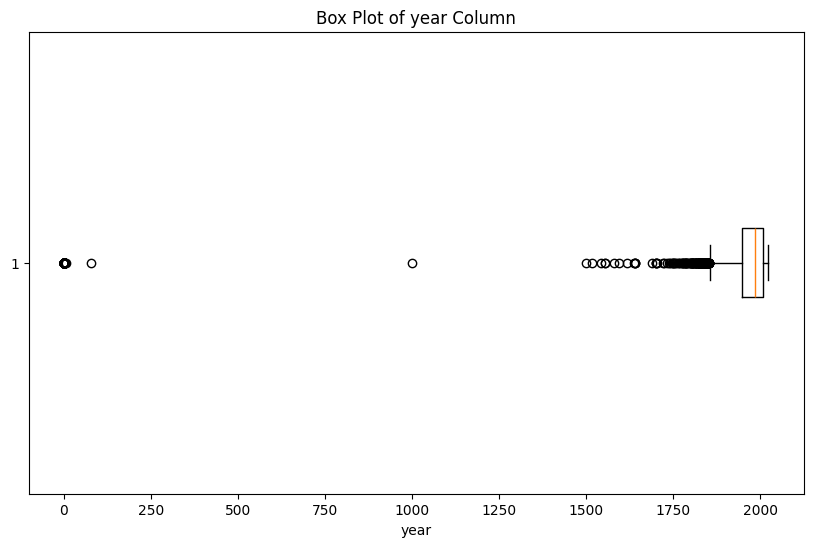

In [75]:
# 3.6.1. Identify outliers using method box plots in 'year' col (keep only data from 1960)
def identify_outliers(df, column):
    """
    Identifies outliers in a specified column of a DataFrame using the IQR method and visualizes them with a box plot.

    :param df: pandas DataFrame
    :param column: The name of the column to analyze for outliers
    :return: A DataFrame containing the outliers and a box plot of the column
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Plotting the box plot to visualize outliers
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[column], vert=False)
    plt.title(f'Box Plot of {column} Column')
    plt.xlabel(column)

    # Return the DataFrame containing outliers
    return plt.show()


identify_outliers(df, 'year')

In [76]:
def handle_year_outliers(df):
    df = df[df['year'] >= 1954]
    return df


df = handle_year_outliers(df)
df.head()

,year,type,country,state,location,activity,name,sex,age,time,species,source,correct_date,time_of_day,age_group,fatality_status,injury_type,species_types
0,2024,Unprovoked,Australia,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,Female,13,16h00,Tiger shark,"Yahoo News, 3/15/2024",2024-03-15,Day,13-18,survived,back,tiger
1,2024,Unprovoked,Usa,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,Male,28,NaN,Tiger shark 8',"Surfer, 3/6/2024F",2024-03-06,Unknown,26-35,survived,Unknown,tiger
2,2024,Unprovoked,Usa,Hawaii,"Rainbows, Oahu",Swimming,NaN,Female,11,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024",2024-03-04,Day,0-12,survived,foot,Unknown
3,2024,Unprovoked,Australia,Western Australia,"Sandlnd Island, Jurian Bay",Unidentified,female,Female,46,11h30,Tiger shark,"WA Today, 2/26/2024",2024-02-26,Morning,46-55,survived,leg,tiger
4,2024,Unprovoked,India,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,Male,32,NaN,"Bull shark, 7'","Times of India, 2/14/2024",2024-02-14,Unknown,26-35,survived,leg,bull


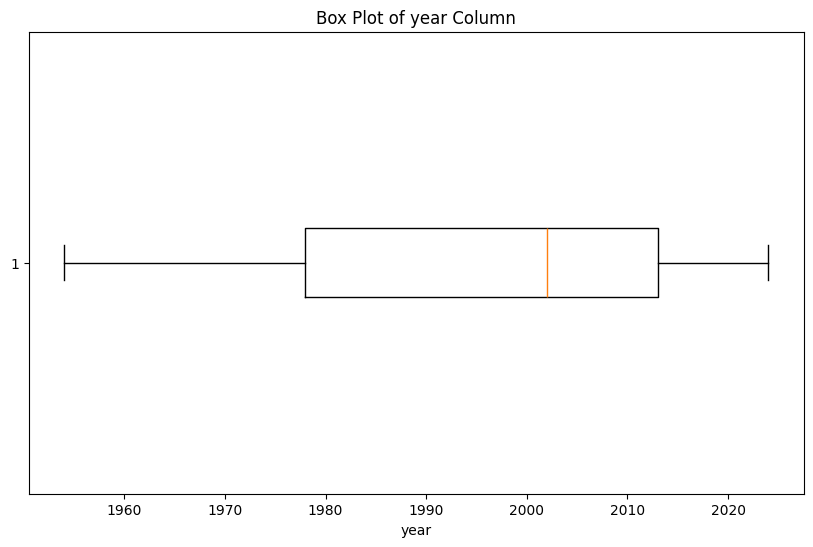

In [77]:
# identify outliers in col 'year'
import matplotlib.pyplot as plt
import pandas as pd


def identify_outliers(df, column):
    """
    Identifies outliers in a specified column of a DataFrame using the IQR method and visualizes them with a box plot.

    :param df: pandas DataFrame
    :param column: The name of the column to analyze for outliers
    :return: A DataFrame containing the outliers and a box plot of the column
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Plotting the box plot to visualize outliers
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[column], vert=False)
    plt.title(f'Box Plot of {column} Column')
    plt.xlabel(column)

    # Return the DataFrame containing outliers
    return plt.show()


# Example usage:
identify_outliers(df, 'year')

#### Handle outliers in correct_date col :

- check outliers


In [78]:
df['correct_date'].describe()

count                             4988
mean     1996-07-05 01:04:22.710505216
min                1954-01-21 00:00:00
25%                1980-12-29 00:00:00
50%                2002-06-12 00:00:00
75%                2013-09-05 12:00:00
max                2103-12-10 00:00:00
Name: correct_date, dtype: object

#### Handle outliers in age col :

- check outliers


In [79]:
df['age'].describe()

count    4988.000000
mean       28.492983
std        12.080446
min         1.000000
25%        21.000000
50%        28.000000
75%        30.000000
max        87.000000
Name: age, dtype: float64

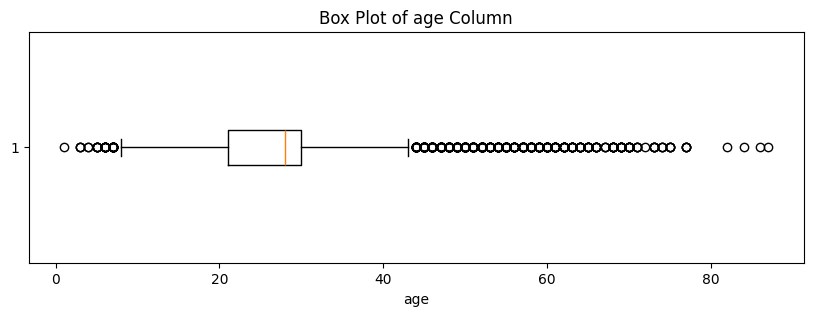

In [103]:
def identify_outliers(df, column):
    """
    Identifies outliers in a specified column of a DataFrame using the IQR method and visualizes them with a box plot.

    :param df: pandas DataFrame
    :param column: The name of the column to analyze for outliers
    :return: A DataFrame containing the outliers and a box plot of the column
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Plotting the box plot to visualize outliers
    plt.figure(figsize=(10, 3))
    plt.boxplot(df[column], vert=False)
    plt.title(f'Box Plot of {column} Column')
    plt.xlabel(column)

    # Return the DataFrame containing outliers
    return plt.show()


# Example usage:
identify_outliers(df, 'age')

#### Extract final cleaned df to csv file


In [81]:
df_final = df.to_csv(
    '../eda_sharks_project/data/cleaned_data/final_cleaned_df.csv')

## 4. Visualizations

- 4.1. Attacks number by year (line graph)
- 4.2. Attacks number per Activity (bar chart)
- 4.3. Attacks number per Countries/States (bar chart)
- 4.4. Attacks counts by Months (bar chart)
- 4.5. Attacks by time of the day (pie chart)
- 4.6. Victimes by 'age' (make bins, bar chart)
- 4.7. Victimes by 'sex' (staked bar chart)
- 4.8. Fatality status (pie chart)


#### 4.1. Attacks number by year (line graph)


In [82]:
# Counting the number of rows per year (number of attacks). final_cleaned_df['year'] for the X-axis and the count of rows for each year (representing the number of attacks) for the Y-axis
yearly_attacks = df.groupby('year').size().reset_index(name='attacks')

# Creating the line graph using Plotly Express
fig = px.line(yearly_attacks, x='year', y='attacks', title='Attacks by Year',
              labels={'year': 'Year', 'attacks': 'Number of Attacks'})

# Show the plot
fig.show()

#### 4.2. Attacks number per Activity


In [83]:
# visualize attacks per activity
def plot_top_10_activities(df):
    # Directly convert the top 10 activities Series to a DataFrame
    top_activities_df = df['activity'].value_counts().nlargest(
        10).reset_index()
    # Renaming columns for clarity
    top_activities_df.columns = ['activity', 'counts']

    # Create and display the bar chart using Plotly Express
    fig = px.bar(top_activities_df, x='activity', y='counts',
                 title="Attacks by Activity",
                 labels={'activity': 'Activity', 'counts': 'Number of Counts'},
                 text='counts')  # Adding text to display counts on the bars
    fig.show()


plot_top_10_activities(df)

#### 4.3. Attacks number per Country


In [84]:
# visualize attacks per country
def plot_country_counts(df):
    # Count the occurrences of each country
    country_counts = df['country'].value_counts().nlargest(20).reset_index()
    # Rename columns for clarity
    country_counts.columns = ['country', 'counts']

    # Create the bar chart using Plotly Express
    fig = px.bar(country_counts, x='country', y='counts',
                 title="Attacks per Country",
                 labels={'country': 'Country', 'counts': 'Number of Rows'},
                 text='counts')  # Display counts on the bars
    fig.show()


plot_country_counts(df)

#### 4.4. Attacks by Months


In [85]:
# Attacks per month. Total counts of attacks per month, combining data from all years present in the dataset
def plot_monthly_trends(df):
    # Ensure 'correct_date' is in datetime format
    df['correct_date'] = pd.to_datetime(df['correct_date'], errors='coerce')

    # Extract the month from the 'correct_date' and count occurrences
    df['month'] = df['correct_date'].dt.month
    month_counts = df['month'].value_counts().sort_index().reset_index()
    month_counts.columns = ['month', 'counts']  # Rename columns for clarity

    # Map numeric months to month names for better readability
    month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April',
                   5: 'May', 6: 'June', 7: 'July', 8: 'August',
                   9: 'September', 10: 'October', 11: 'November', 12: 'December'}
    month_counts['month'] = month_counts['month'].map(month_names)

    # Create the bar chart using Plotly Express
    fig = px.bar(month_counts, x='month', y='counts',
                 title="Attacks by Months",
                 labels={'month': 'Month', 'counts': 'Number of Rows'},
                 text='counts')  # Display counts on the bars
    fig.show()


plot_monthly_trends(df)

In [86]:
df.head()

,year,type,country,state,location,activity,name,sex,age,time,species,source,correct_date,time_of_day,age_group,fatality_status,injury_type,species_types,month
0,2024,Unprovoked,Australia,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,Female,13,16h00,Tiger shark,"Yahoo News, 3/15/2024",2024-03-15,Day,13-18,survived,back,tiger,3
1,2024,Unprovoked,Usa,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,Male,28,NaN,Tiger shark 8',"Surfer, 3/6/2024F",2024-03-06,Unknown,26-35,survived,Unknown,tiger,3
2,2024,Unprovoked,Usa,Hawaii,"Rainbows, Oahu",Swimming,NaN,Female,11,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024",2024-03-04,Day,0-12,survived,foot,Unknown,3
3,2024,Unprovoked,Australia,Western Australia,"Sandlnd Island, Jurian Bay",Unidentified,female,Female,46,11h30,Tiger shark,"WA Today, 2/26/2024",2024-02-26,Morning,46-55,survived,leg,tiger,2
4,2024,Unprovoked,India,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,Male,32,NaN,"Bull shark, 7'","Times of India, 2/14/2024",2024-02-14,Unknown,26-35,survived,leg,bull,2


#### 4.5. Victimes by 'age_group' (make bins, bar chart)


In [90]:
# 4.5. Plot Victimes by 'age_group' (make bins, bar chart)
def plot_victims_by_age_group(df, column):
    # Remove rows where the specified column has 0 values
    df = df[df[column] != 0]

    # Group by the specified column and count the number of victims in each category
    age_group_counts = df.groupby(column).size().reset_index(name='counts')

    # Create a bar chart using Plotly Express
    fig = px.bar(age_group_counts, x=column, y='counts',
                 title="Victims by Age Group",
                 labels={column: 'Age Group', 'counts': 'Number of Victims'},
                 text='counts')  # Display counts on the bars

    # Show the plot
    fig.show()


plot_victims_by_age_group(df, 'age_group')

/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_48565/689196743.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



#### 4.6. Attacks by time of the day, 'sex', Fatality status (pie charts)


In [88]:
# 4.6. Attacks by time of the day (pie chart)
# 4.7. Victims by 'sex' (staked bar chart)
# 4.8. Fatality status (pie chart)
def plot_category_distribution(df, column_name, chart_title):
    # Count occurrences of each category
    category_counts = df[column_name].value_counts().reset_index()
    # Rename columns for clarity
    category_counts.columns = [column_name, 'counts']

    # Create the pie chart using Plotly Express
    fig = px.pie(category_counts, names=column_name, values='counts',
                 title=chart_title,
                 color=column_name,  # Optional: colors each segment by category
                 labels={column_name: column_name,
                         'counts': 'Number of Occurrences'},
                 hole=0.4)  # Adjust hole size for a donut-like appearance

    # Update the layout to move labels outside the pie chart
    fig.update_traces(textposition='outside', textinfo='label+percent')
    fig.update_layout(uniformtext_minsize=12,
                      uniformtext_mode='hide', legend_title_text=column_name)

    # Show the plot
    fig.show()


# Usage examples:
plot_category_distribution(df, 'time_of_day', "Attacks per Time of Day")
plot_category_distribution(df, 'sex', "Victims by Gender")
plot_category_distribution(df, 'fatality_status', "Fatality status")

#### 4.7. Attacks by type:


In [101]:
def plot_victims_by_type(df, column):
    # Remove rows where the specified column has missing values
    df = df[df[column].notna()]

    # Group by the specified column and count the number of victims in each category
    type_counts = df.groupby(column).size().reset_index(name='counts')

    # Create a bar chart using Plotly Express
    fig = px.bar(type_counts, x=column, y='counts',
                 title="Victims by Type of Shark Attack",
                 labels={column: 'Type of Attack',
                         'counts': 'Number of Victims'},
                 text='counts')  # Display counts on the bars

    # Show the plot
    fig.show()


plot_victims_by_type(df, 'type')

#### 4.8. Injury type

In [106]:
def plot_victims_by_type(df, column):
    # Remove rows where the specified column has missing values
    df = df[df[column].notna()]

    # Group by the specified column and count the number of victims in each category
    type_counts = df.groupby(column).size().reset_index(name='counts')

    # Sort the dataframe by 'counts' in descending order to display bars sorted
    type_counts = type_counts.sort_values(by='counts', ascending=False)

    # Create a bar chart using Plotly Express
    fig = px.bar(type_counts, x=column, y='counts',
                 title="Victims by Injury Type of Shark Attack",
                 labels={column: 'Injury Type of Attack',
                         'counts': 'Number of Victims'},
                 text='counts')  # Display counts on the bars
    fig.show()

plot_victims_by_type(df, 'injury_type')